---

title: Re-Understanding Pearson Correlation Coefficient
date: 2022-08-22
author: Hongtao Hao
slug: corr2
draft: false
toc: false
tags: ML

---

Everyone seems to know correlation but they do not. At least I didn't. 

To understand correlation, we need to first understand covariance. As the name suggests, covariance measures the extent to which two variables **covary**, i.e., vary together. But the questions are: what does "vary" mean, and how do we quantify "together"?

For example, I give you these two vectors:

In [1]:
import matplotlib.pyplot as plt

a = [2, 4, 6, 8]
b = [1, 2, 3, 8]

Can you tell me the extent to which they "vary together"?

In [2]:
# [a[i] - b[i] for i in range(4)]

Text(0, 0.5, 'b')

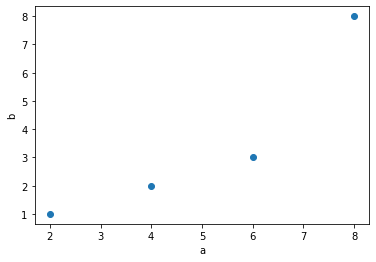

In [3]:
fig1, ax = plt.subplots(1, 1)
ax.scatter(a,b)
plt.xlabel('a')
plt.ylabel('b')

## What do we mean by "Covary"?

When two variables vary together:
  1. If an item in one variable increases, then the corresponding item in the other variable increases as well. 
  2. If an item in one variable increases considerably, then the corresponding item in the other variable increases considerably as well.
  
The same applies when variables decrease. 

The above statements answer our question of "what 'together' means". But what does "vary" mean? What do we mean by "an item in one variable increases"? Increase or decrease compared to what?

We have a bunch of choices: mean, median, mode, quartile, maximum, minimum, etc. I might revisit this question later, but right now, let's choose an intuitive one: the mean. 

Then we can rewrite the above statements this way:

  1. If an item in `a` increases compared to the mean of `a`, then the corresponding item in `b` increases as well, compared to the mean of `b`. 
  2. If an item in `a` increases considerably compared to the mean of `a`, then the corresponding item in `b` increases considerably as well, compared to the mean of `b`. 
  
The same applies to when items decrease. 

Therefore, if `a` and `b` covary, then $a_i - \bar{a}$ and $b_i - \bar{b}$ should have these properties:

  1. They should have the same sign. That is to say, if $a_i - \bar{a}$ is positive, then $b_i - \bar{b}$ should be positive as well. 
  2. If $a_i - \bar{a}$ is big, then $b_i - \bar{b}$ should be big as well. 
  
## Same sign
  
Let's focus on the first property: same sign. This shouldn't be very difficult to solve. To make sure they have the same sign, we can multiply the two, i.e., $(a_i - \bar{a}) \cdot (b_i - \bar{b})$.

However, we are talking about the covariance of two variables, not two individual items. Therefore, we need to consider the cumulative effect of all **deviation pairs**, i.e., $a_i - \bar{a}$ and $b_i - \bar{b}$. That's why why need the sum of $(a_i - \bar{a}) \cdot (b_i - \bar{b})$:

$$\sum_{i=1}^N (a_i - \bar{a}) \cdot (b_i - \bar{b})$$

It's even better if we can devide it by the number of deviation pairs, so that we can know the average effect of all deviation pairs:

$$\frac{\sum_{i=1}^N (a_i - \bar{a}) \cdot (b_i - \bar{b})}{N}$$

where $N$ is the deviation pairs. Note that, if we are esitmating a population based on samples, we need [Bessel’s Correction](https://en.wikipedia.org/wiki/Bessel%27s_correction):

$$Cov(a,b) = \frac{\sum_{i=1}^N (a_i - \bar{a}) \cdot (b_i - \bar{b})}{N-1}$$

This, in fact, is the definition of [covariance](https://en.wikipedia.org/wiki/Covariance). 

(I know you may wonder why on earth the sum, or the mean, of $(a_i - \bar{a}) \cdot (b_i - \bar{b})$ tells us whether in general $(a_i - \bar{a})$ and  $(b_i - \bar{b})$ have the same sign. Bear with me for now, and you'll know why below.)

## Proportional deviations 

The question now is, does the above equation satisfy the second property? The answer is NO. Why?

First, our statment is ambiguous: what does it mean by "when A is big then B should be big as well"? How to quantify it? We can defign it this way: **$(a_i - \bar{a})$ should be proportional to $(b_i - \bar{b})$**.

Then, the question is, does the above eqution tell us how proportional the deviation pairs are? The answer is: NO. If the answer is Yes, then when two deviation pairs are both perfectly proportional, then the two results from the equation should be exactly the same. But they aren't. 

For example, 

Text(0, 0.5, 'b')

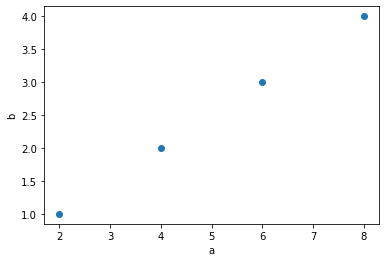

In [4]:
a = [2, 4, 6, 8]
b = [1, 2, 3, 4]
plt.scatter(a,b)
plt.xlabel('a')
plt.ylabel('b')

Text(0, 0.5, 'd')

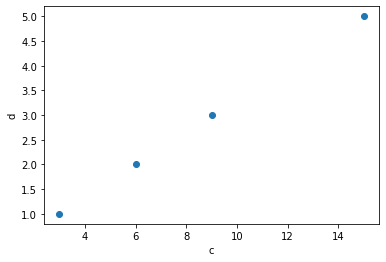

In [5]:
c = [3, 6, 9, 15]
d = [1, 2, 3, 5]
plt.scatter(c,d)
plt.xlabel('c')
plt.ylabel('d')

In [6]:
def my_average(array):
    '''calculate the average of an array
    '''
    my_sum = 0
    for i in array:
        my_sum += i
    return my_sum/len(array)

In [7]:
deviation_a = [(i - my_average(a)) for i in a ]
deviation_b = [(i - my_average(b)) for i in b ]
[deviation_a[i]/deviation_b[i] for i in range(len(deviation_a))]

[2.0, 2.0, 2.0, 2.0]

In [8]:
deviation_c = [(i - my_average(c)) for i in c ]
deviation_d = [(i - my_average(d)) for i in d ]
[deviation_c[i]/deviation_d[i] for i in range(len(deviation_c))]

[3.0, 3.0, 3.0, 3.0]

We can see that both deviation pairs are perfectly proportional, which means that both (a,b) and (c,d) covary perfectly. However, their covariance is different:

In [9]:
def covariance(xs, ys):
    '''calculate covariance of two arrays
    '''
    assert len(xs) == len(ys), 'The lengths of the two arrays are not equal!'
    x_mean = my_average(xs)
    y_mean = my_average(ys)
    cov_sum = 0
    for i in range(len(xs)):
        cov_sum += xs[i] * ys[i]
    return cov_sum / (len(xs) - 1)

In [10]:
covariance(a,b)

20.0

In [11]:
covariance(c,d)

39.0

## Understanding covariance through linear algebra

If you are familiar with linear algebra, you'll know that 

$$\sum_{i=1}^N (a_i - \bar{a}) \cdot (b_i - \bar{b})$$

is the dot product of two vectors: $\vec{d_a} = a_i - \bar{a}$ and $\vec{d_b} = b_i - \bar{b}$, where $d$ denotes deviation. These vectors are $N$-dimensional, where $N$ is the size of $d_a$ (or $d_b$, which must be the same). 

When the dot product of two vectors is positive, then these two vectors are generally pointing to the same direction; when negative, different directions. However, the magnitude of the dot product doesn't translate into **the extent to which** two vectors are pointing to the same direction. 

![](img/corr-a-b.png)



Suppose in two dimensional space, we have the above two vectors, $\vec{d_a}$ and $\vec{d_b}$. Then, imagine we indefinitly extend $\vec{d_b}$, which we call $\vec{db_e}$. The dot product of $\vec{d_a}$ and $\vec{d_b}$ is definitly different from (smaller than) that of $\vec{d_a}$ and $\vec{db_e}$. However, the extent to which $\vec{d_a}$ and $\vec{d_b}$ are pointing to the same direction is the same as that to which $\vec{d_a}$ and $\vec{db_e}$ are pointing to the same direction. 

Wait, you may say, above, we were talking about **the extent to which $d_a = (a_i - \bar{a})$ is proportional to $d_b = (b_i - \bar{b})$**, but right now we are talking about the extent to which $\vec{d_a}$ and $\vec{d_b}$ are pointing to the same direction. Are they the same?

Yes. They are the same. I am not capable of mathematically proving that they are the same but I will illustrate it this way. Imagaine in a three dimensional space, the coordinates of $\vec{m}$ is $x_m$, $y_m$, and $z_m$ and those of $\vec{t}$ is $x_t$, $y_t$, and $z_t$. If $m_i$ is perfectly positively proportional to $t_i$, then $\vec{m}$ and $\vec{t}$ will overlap and point to the same direction. Then, $\theta = 0$. If they are perfectly negatively proportional to each other, then they will overlpa but point to exactly the opposite direction. Then $\theta = 180$. If they are perfectly not proportional to each other, then they are perpendicular to each other and $\theta = 90$. 

Therefore, it seems that the extent to which $d_a = (a_i - \bar{a})$ is proportional to $d_b = (b_i - \bar{b})$ is related to $\theta$:

  - When $0 \leq \theta \lt 90$, $d_a$ is positively proportional to $d_b$. As $\theta$ increases, the extent the extent to which $d_a = (a_i - \bar{a})$ is proportional to $d_b = (b_i - \bar{b})$ decreases. 
  - When $\theta = 90$, $d_a$ is not proportional to $d_b$ at all. 
  - When $90 \lt \theta \leq 180$, $d_a$ is negatively proportional to $d_b$. As $\theta$ increases, the extent the extent to which $d_a = (a_i - \bar{a})$ is proportional to $d_b = (b_i - \bar{b})$ increases. 
  
When we know the items in $a$ and $b$, we will know $a_i - \bar{a}$ and $b_i - \bar{b}$, so we will know the coordinates of $\vec{d_a}$ and $\vec{d_b}$, then we can know $\theta$ through:

$$\vec{d_a} \cdot \vec{d_b} = ||\vec{d_a}||\cdot||\vec{d_b}||\cdot \cos\theta$$

BTW, if you wonder how the above equation came from, refer to [my post here](/en/2022/07/07/la/#lesson-9-dot-products-and-duality).

Therefore, 

$$\cos\theta = \frac{\vec{d_a} \cdot \vec{d_b}}{||\vec{d_a}||\cdot||\vec{d_b}||}$$

**This, in fact, is the same as the formula of [Pearson's correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)** :

\begin{align}
\rho(a,b) & =  \frac{Cov(a,b)}{\sigma_a \sigma_b} \\\\
 & = \frac{\frac{1}{N-1}\cdot\sum_{i=1}^N (a_i - \bar{a}) \cdot (b_i - \bar{b})}{\sigma_a \sigma_b} \\\\ 
 & = \frac{\frac{1}{N-1}\cdot \vec{d_a} \cdot \vec{d_b}}{\sigma_a \sigma_b} \\\\
 & = \frac{\frac{1}{N-1}\cdot \vec{d_a} \cdot \vec{d_b}}{\sqrt{\frac{\sum_{i=1}^N (a_i - \bar{a})^2}{N-1}} \sqrt{\frac{\sum_{i=1}^N (b_i - \bar{b})^2}{N-1}}} \\\\
 & = \frac{\frac{1}{N-1}\cdot \vec{d_a} \cdot \vec{d_b}}{\frac{1}{N-1} \sqrt{\sum_{i=1}^N (a_i - \bar{a})^2} \sqrt{\sum_{i=1}^N (b_i - \bar{b})^2}} \\\\
 & = \frac{\vec{d_a} \cdot \vec{d_b}}{\sqrt{\sum_{i=1}^N (a_i - \bar{a})^2} \sqrt{\sum_{i=1}^N (b_i - \bar{b})^2}} \\\\
 & = \frac{\vec{d_a} \cdot \vec{d_b}}{||\vec{d_a}||\cdot||\vec{d_b}||} \\\\
 & = \cos \theta \\\\
\end{align}

Therefore, correlation between two variables $\rho(a,b)$ **measures the cosine of the angle between the two corresponding deviation vectors in N-dimensional space where N is size of a (or b)**. By deviation vector, I mean the vector of differences between each item in a (and b) and its corresponding mean, i.e., $\bar{a}$ (and $\bar{b}$).

## Recap

We want to understand the extent to which two variables covary, i.e., vary together. For each item in the two variables, say, $a$ and $b$, we calculate its deviation from its corresponding mean. Then we have two **deviation vectors**: $\vec{d_a} = a_i - \bar{a}$ and $\vec{d_b} = b_i - \bar{b}$. If $a$ and $b$ vary together, then the two deviation vectors should have the following two properties:

  1. $a_i - \bar{a}$ and $b_i - \bar{b}$ in general should have the same sign. 
  2. When $a_i - \bar{a}$ is big, $b_i - \bar{b}$ should be big as well. 
  
To satisfy the first property, we calculate the sum of product of $a_i - \bar{a}$ and $b_i - \bar{b}$. We find that this is equal to the dot product of $\vec{d_a}$ and $\vec{d_b}$. When the result is positive, then $\vec{d_a}$ and $\vec{d_b}$ are in general pointing to the same direction, and therefore, $a_i - \bar{a}$ and $b_i - \bar{b}$ in general share the same sign. However, the dot product does not satisfy the second property. We find that the second property is measuring **the extent to which** $\vec{d_a}$ and $\vec{d_b}$ are pointing to the same direction. Dot products do not tell us this. 

To know the extent to which $\vec{d_a}$ and $\vec{d_b}$ are pointing to the same direction, we divide the dot product by the product of these two vectors' lengths (in Euclidean distance). This quotient is the cosine of the angle between $\vec{d_a}$ and $\vec{d_b}$. This explains why the correlation between two variables is always between $-1$ and $1$. 